# PowerClimb Data Graphs and Analysis


In [2]:
import warnings
warnings.filterwarnings('ignore')

import chardet

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import scipy.stats as st

import ipywidgets as widgets
from ipywidgets import interact


In [3]:
#Detect what the file is ecoded with
with open('AssessmentDataSept2022.csv', 'rb') as f:
    data = f.read()

result = chardet.detect(data)
encoding = result['encoding']
confidence = result['confidence']

print(f"Detected encoding: {encoding} with confidence {confidence:.2f}")


Detected encoding: Windows-1252 with confidence 0.73


In [4]:
#open file with the required encoding
df = pd.read_csv('AssessmentDataSept2022.csv', encoding='Windows-1252')


In [5]:
df

,age,sex,max_boulder,max_sport,exp,trainexp,country,state,rock,season,...,ohpr,ohll,dl,sportgrade,bouldergrade,powl,powr,lhang,armjump,hipjump
0,43,Female,<V3,5.10c/d,>10 years,<1 year,United States,KY,Sandstone,7-9 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,Female,V6,5.12c/d,7-8 years,7-8 years,US,Montana,Limestone,4-6 months,...,15.0,15.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Male,V9,5.13c/d,>10 years,7-8 years,Usa,Georgia,Sandstone,4-6 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34,Male,V8,5.12a/b,>10 years,5-6 years,USA,North Carolina,Granite,4-6 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,Female,V8,5.12a/b,7-8 years,3-4 years,US,Washington,Granite,4-6 months,...,25.0,25.0,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,Female,<V3,I have not pursued sport climbing goals outsid...,1-2 years,<1 year,United States,California,NaN,Year round,...,30.0,25.0,175.0,5.11a/b,V5,24.0,24.0,NaN,NaN,NaN
608,48,Female,V5,5.13a/b,>10 years,1-2 years,Canada,British Columbia,Granite,1-3 months,...,30.0,26.0,120.0,5.12c/d,V4,20.0,20.5,NaN,NaN,NaN
609,39,Female,I have not pursued bouldering goals outside in...,5.12c/d,>10 years,5-6 years,United States,Colorado,Limestone,7-9 months,...,35.0,35.0,165.0,5.12a/b,V5,27.0,27.0,NaN,NaN,NaN
610,25,Male,V10,5.12c/d,5-6 years,1-2 years,united states,NC,Quartzite,4-6 months,...,55.0,55.0,325.0,5.12c/d,V9,38.0,39.0,NaN,NaN,NaN


In [6]:
df.columns

Index(['age', 'sex', 'max_boulder', 'max_sport', 'exp', 'trainexp', 'country',
       'state', 'rock', 'season', 'days', 'height', 'weight', 'span', 'pullup',
       'pushup', 'continuous', 'maxhang', 'weightedpull', 'repeaters1',
       'longcamp', 'shortcamp', 'ohpr', 'ohll', 'dl', 'sportgrade',
       'bouldergrade', 'powl', 'powr', 'lhang', 'armjump', 'hipjump'],
      dtype='object')

In [7]:
df.shape

(612, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           612 non-null    int64  
 1   sex           609 non-null    object 
 2   max_boulder   608 non-null    object 
 3   max_sport     606 non-null    object 
 4   exp           608 non-null    object 
 5   trainexp      610 non-null    object 
 6   country       514 non-null    object 
 7   state         426 non-null    object 
 8   rock          581 non-null    object 
 9   season        598 non-null    object 
 10  days          586 non-null    object 
 11  height        608 non-null    float64
 12  weight        611 non-null    float64
 13  span          580 non-null    float64
 14  pullup        601 non-null    float64
 15  pushup        598 non-null    float64
 16  continuous    582 non-null    object 
 17  maxhang       582 non-null    float64
 18  weightedpull  590 non-null    

In [9]:
df.describe()

,age,height,weight,span,pullup,pushup,maxhang,weightedpull,repeaters1,longcamp,shortcamp,ohpr,ohll,dl,powl,powr,lhang,armjump,hipjump
count,612.000000,608.000000,611.000000,580.000000,601.000000,598.000000,582.000000,590.000000,550.000000,303.000000,302.000000,229.000000,229.000000,226.000000,339.000000,339.000000,13.000000,11.000000,11.000000
mean,33.416667,68.639059,151.698249,70.170483,14.509151,28.777592,55.462045,70.018475,117.336364,79.703069,136.919007,43.934498,42.784279,228.278761,30.545413,30.659808,23.498462,74.781818,70.777273
std,7.777254,5.505879,22.855757,15.106648,6.861754,17.715007,31.189489,33.364914,75.557898,42.432530,108.035450,15.512872,15.451623,93.409765,9.471775,9.615560,12.056949,16.236260,11.366758
min,16.000000,57.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,35.500000,52.250000
25%,28.000000,66.000000,136.000000,66.687500,11.000000,20.000000,35.000000,50.000000,70.000000,55.500000,75.000000,35.000000,35.000000,175.000000,26.500000,26.500000,13.000000,69.500000,61.400000
50%,32.000000,69.000000,153.000000,70.000000,14.000000,28.000000,55.000000,70.000000,105.000000,75.000000,110.000000,45.000000,45.000000,235.000000,31.000000,31.000000,23.000000,79.000000,70.500000
75%,38.000000,71.000000,166.500000,73.000000,18.000000,35.000000,75.000000,90.750000,150.000000,99.000000,156.000000,55.000000,53.000000,300.000000,35.000000,35.500000,33.000000,81.000000,80.375000
max,73.000000,160.000000,288.000000,190.000000,68.000000,330.000000,200.000000,271.000000,480.000000,260.000000,730.000000,90.000000,85.000000,455.000000,77.000000,78.000000,43.000000,100.250000,89.000000


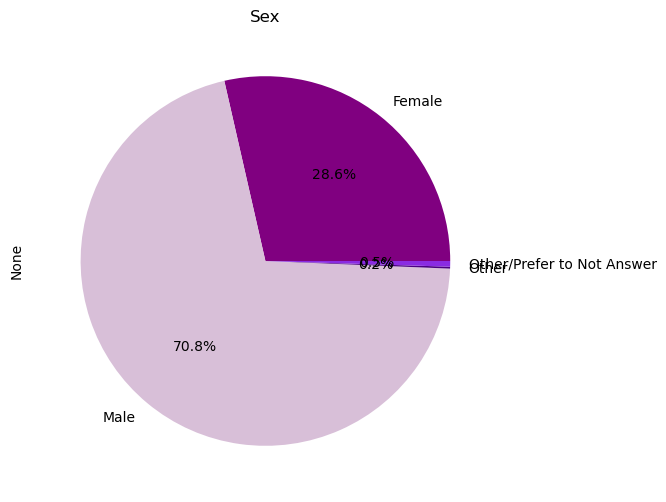

In [10]:
#group by the sex column
grouped = df.groupby(df.columns[1]).count().max(axis=1)

# define the colors for the pie chart
colors = ['purple', 'thistle', 'indigo', 'blueviolet']

# create the pie chart
plot = grouped.plot.pie(title="Sex", autopct='%1.1f%%', figsize=(6,6), colors=colors)

# display the plot
plt.show()

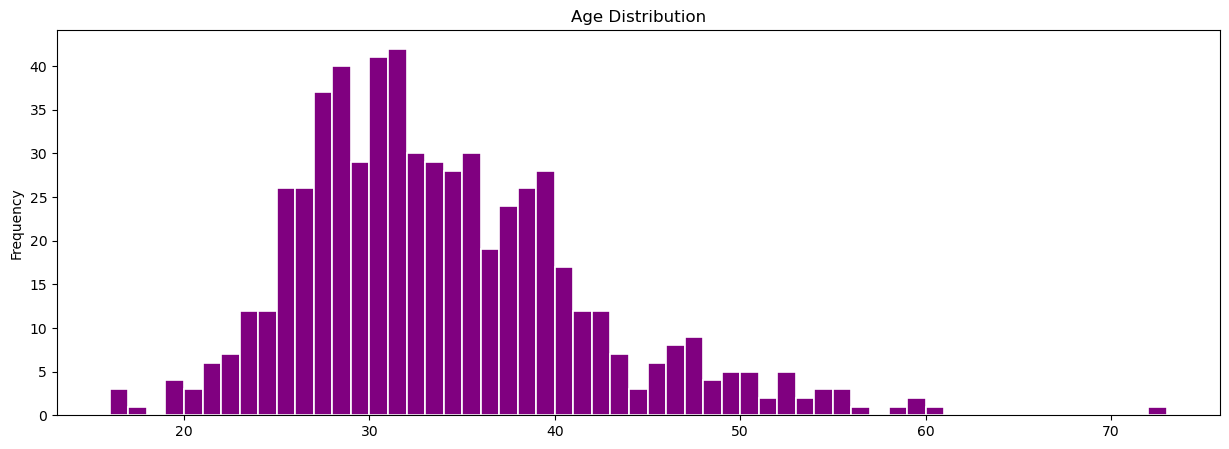

In [11]:
df[df.columns[0]].plot.hist(title="Age Distribution", bins=df[df.columns[0]].max()-df[df.columns[0]].min(), figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()


# Data cleaning

In [12]:
#Drop the unusable columns
df.drop(['state','longcamp', 'shortcamp', 'ohpr', 'ohll', 'dl', 'sportgrade',
       'bouldergrade', 'powl', 'powr', 'lhang', 'armjump', 'hipjump', 'country',
       'state', 'rock', 'repeaters1', 'max_sport', 'continuous', 'days'], inplace=True, axis=1)


In [13]:
df

,age,sex,max_boulder,exp,trainexp,season,height,weight,span,pullup,pushup,maxhang,weightedpull
0,43,Female,<V3,>10 years,<1 year,7-9 months,65.00,151.0,65.00,2.0,6.0,37.0,10.0
1,16,Female,V6,7-8 years,7-8 years,4-6 months,64.00,125.0,64.00,15.0,30.0,10.0,20.0
2,19,Male,V9,>10 years,7-8 years,4-6 months,70.00,155.0,74.00,18.0,70.0,35.0,85.0
3,34,Male,V8,>10 years,5-6 years,4-6 months,68.00,165.0,72.00,15.0,35.0,50.0,70.0
4,30,Female,V8,7-8 years,3-4 years,4-6 months,68.00,142.0,70.00,5.0,7.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,Female,<V3,1-2 years,<1 year,Year round,60.75,103.0,60.00,12.0,19.0,15.0,42.0
608,48,Female,V5,>10 years,1-2 years,1-3 months,63.00,125.0,63.00,7.0,15.0,35.0,22.0
609,39,Female,I have not pursued bouldering goals outside in...,>10 years,5-6 years,7-9 months,65.75,115.0,66.75,15.0,48.0,70.0,55.0
610,25,Male,V10,5-6 years,1-2 years,4-6 months,73.00,166.0,74.00,32.0,48.0,75.0,135.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           612 non-null    int64  
 1   sex           609 non-null    object 
 2   max_boulder   608 non-null    object 
 3   exp           608 non-null    object 
 4   trainexp      610 non-null    object 
 5   season        598 non-null    object 
 6   height        608 non-null    float64
 7   weight        611 non-null    float64
 8   span          580 non-null    float64
 9   pullup        601 non-null    float64
 10  pushup        598 non-null    float64
 11  maxhang       582 non-null    float64
 12  weightedpull  590 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 62.3+ KB


<AxesSubplot:>

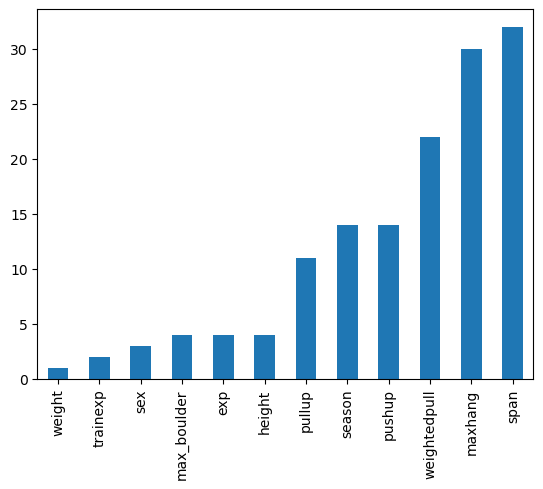

In [15]:
#plot the missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [16]:
#Drop NaN values from the entire dataframe
df.dropna(inplace=True)

df

,age,sex,max_boulder,exp,trainexp,season,height,weight,span,pullup,pushup,maxhang,weightedpull
0,43,Female,<V3,>10 years,<1 year,7-9 months,65.00,151.0,65.00,2.0,6.0,37.0,10.0
1,16,Female,V6,7-8 years,7-8 years,4-6 months,64.00,125.0,64.00,15.0,30.0,10.0,20.0
2,19,Male,V9,>10 years,7-8 years,4-6 months,70.00,155.0,74.00,18.0,70.0,35.0,85.0
3,34,Male,V8,>10 years,5-6 years,4-6 months,68.00,165.0,72.00,15.0,35.0,50.0,70.0
4,30,Female,V8,7-8 years,3-4 years,4-6 months,68.00,142.0,70.00,5.0,7.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,Female,<V3,1-2 years,<1 year,Year round,60.75,103.0,60.00,12.0,19.0,15.0,42.0
608,48,Female,V5,>10 years,1-2 years,1-3 months,63.00,125.0,63.00,7.0,15.0,35.0,22.0
609,39,Female,I have not pursued bouldering goals outside in...,>10 years,5-6 years,7-9 months,65.75,115.0,66.75,15.0,48.0,70.0,55.0
610,25,Male,V10,5-6 years,1-2 years,4-6 months,73.00,166.0,74.00,32.0,48.0,75.0,135.0


In [17]:
unique_values = df['max_boulder'].unique()

print(unique_values)

['<V3' 'V6' 'V9' 'V8' 'V7' 'V12' 'V4' 'V5' 'V10' 'V15'
 'I have not pursued bouldering goals outside in the past year' 'V13'
 'V11' '? V3' 'V14']


In [18]:
#map the current V grade values to a new number so it can be used in analysis
mapping = {'<V3':1,
           'V3': 2, 
           'V4': 3, 
           'V5': 4, 
           'V6': 5, 
           'V7': 6,
           'V8': 7,
           'V9': 8,
           'V10': 9,
           'V11': 10,
           'V12': 11,
           'V13':12,
           'V14': 13,
           'V15': 14, 
           '? V3': 2,
           'I have not pursued bouldering goals outside in the past year': 0
          }

df.loc[:, 'max_boulder'] = df['max_boulder'].map(mapping)


df

,age,sex,max_boulder,exp,trainexp,season,height,weight,span,pullup,pushup,maxhang,weightedpull
0,43,Female,1,>10 years,<1 year,7-9 months,65.00,151.0,65.00,2.0,6.0,37.0,10.0
1,16,Female,5,7-8 years,7-8 years,4-6 months,64.00,125.0,64.00,15.0,30.0,10.0,20.0
2,19,Male,8,>10 years,7-8 years,4-6 months,70.00,155.0,74.00,18.0,70.0,35.0,85.0
3,34,Male,7,>10 years,5-6 years,4-6 months,68.00,165.0,72.00,15.0,35.0,50.0,70.0
4,30,Female,7,7-8 years,3-4 years,4-6 months,68.00,142.0,70.00,5.0,7.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,Female,1,1-2 years,<1 year,Year round,60.75,103.0,60.00,12.0,19.0,15.0,42.0
608,48,Female,4,>10 years,1-2 years,1-3 months,63.00,125.0,63.00,7.0,15.0,35.0,22.0
609,39,Female,0,>10 years,5-6 years,7-9 months,65.75,115.0,66.75,15.0,48.0,70.0,55.0
610,25,Male,9,5-6 years,1-2 years,4-6 months,73.00,166.0,74.00,32.0,48.0,75.0,135.0


In [19]:
#print the NaN count to make sur ethey were all removed
nan_count = df.isna().sum()

print(nan_count)

age             0
sex             0
max_boulder     0
exp             0
trainexp        0
season          0
height          0
weight          0
span            0
pullup          0
pushup          0
maxhang         0
weightedpull    0
dtype: int64


In [20]:
unique_values = df['sex'].unique()

print(unique_values)

['Female' 'Male' 'Other' 'Other/Prefer to Not Answer']


In [21]:
df = df.dropna(subset=['sex'])

df

,age,sex,max_boulder,exp,trainexp,season,height,weight,span,pullup,pushup,maxhang,weightedpull
0,43,Female,1,>10 years,<1 year,7-9 months,65.00,151.0,65.00,2.0,6.0,37.0,10.0
1,16,Female,5,7-8 years,7-8 years,4-6 months,64.00,125.0,64.00,15.0,30.0,10.0,20.0
2,19,Male,8,>10 years,7-8 years,4-6 months,70.00,155.0,74.00,18.0,70.0,35.0,85.0
3,34,Male,7,>10 years,5-6 years,4-6 months,68.00,165.0,72.00,15.0,35.0,50.0,70.0
4,30,Female,7,7-8 years,3-4 years,4-6 months,68.00,142.0,70.00,5.0,7.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,Female,1,1-2 years,<1 year,Year round,60.75,103.0,60.00,12.0,19.0,15.0,42.0
608,48,Female,4,>10 years,1-2 years,1-3 months,63.00,125.0,63.00,7.0,15.0,35.0,22.0
609,39,Female,0,>10 years,5-6 years,7-9 months,65.75,115.0,66.75,15.0,48.0,70.0,55.0
610,25,Male,9,5-6 years,1-2 years,4-6 months,73.00,166.0,74.00,32.0,48.0,75.0,135.0


In [22]:
#map the current gender values to a number instead of a string so it can be used in analysis
mapping = {'Male': 1, 'Female': 0, 'Other/Prefer to Not Answer': 3, 'Other':3}

df.loc[:,'sex'] = df['sex'].map(mapping).astype(int)

df

,age,sex,max_boulder,exp,trainexp,season,height,weight,span,pullup,pushup,maxhang,weightedpull
0,43,0,1,>10 years,<1 year,7-9 months,65.00,151.0,65.00,2.0,6.0,37.0,10.0
1,16,0,5,7-8 years,7-8 years,4-6 months,64.00,125.0,64.00,15.0,30.0,10.0,20.0
2,19,1,8,>10 years,7-8 years,4-6 months,70.00,155.0,74.00,18.0,70.0,35.0,85.0
3,34,1,7,>10 years,5-6 years,4-6 months,68.00,165.0,72.00,15.0,35.0,50.0,70.0
4,30,0,7,7-8 years,3-4 years,4-6 months,68.00,142.0,70.00,5.0,7.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1-2 years,<1 year,Year round,60.75,103.0,60.00,12.0,19.0,15.0,42.0
608,48,0,4,>10 years,1-2 years,1-3 months,63.00,125.0,63.00,7.0,15.0,35.0,22.0
609,39,0,0,>10 years,5-6 years,7-9 months,65.75,115.0,66.75,15.0,48.0,70.0,55.0
610,25,1,9,5-6 years,1-2 years,4-6 months,73.00,166.0,74.00,32.0,48.0,75.0,135.0


In [23]:
#Change inches to cm so it is easier to work with
inches_to_cm = lambda x: x * 2.54

df['height (cm)'] = df['height'].apply(inches_to_cm)

df.drop(columns=['height'], inplace=True)

df

,age,sex,max_boulder,exp,trainexp,season,weight,span,pullup,pushup,maxhang,weightedpull,height (cm)
0,43,0,1,>10 years,<1 year,7-9 months,151.0,65.00,2.0,6.0,37.0,10.0,165.1000
1,16,0,5,7-8 years,7-8 years,4-6 months,125.0,64.00,15.0,30.0,10.0,20.0,162.5600
2,19,1,8,>10 years,7-8 years,4-6 months,155.0,74.00,18.0,70.0,35.0,85.0,177.8000
3,34,1,7,>10 years,5-6 years,4-6 months,165.0,72.00,15.0,35.0,50.0,70.0,172.7200
4,30,0,7,7-8 years,3-4 years,4-6 months,142.0,70.00,5.0,7.0,35.0,25.0,172.7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1-2 years,<1 year,Year round,103.0,60.00,12.0,19.0,15.0,42.0,154.3050
608,48,0,4,>10 years,1-2 years,1-3 months,125.0,63.00,7.0,15.0,35.0,22.0,160.0200
609,39,0,0,>10 years,5-6 years,7-9 months,115.0,66.75,15.0,48.0,70.0,55.0,167.0050
610,25,1,9,5-6 years,1-2 years,4-6 months,166.0,74.00,32.0,48.0,75.0,135.0,185.4200


In [24]:
#Change lbs to KG
lbs_to_kg = lambda x: x * 0.453592

df['weight (kg)'] = df['weight'].apply(lbs_to_kg)

df.drop(columns=['weight'], inplace=True)

df

,age,sex,max_boulder,exp,trainexp,season,span,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg)
0,43,0,1,>10 years,<1 year,7-9 months,65.00,2.0,6.0,37.0,10.0,165.1000,68.492392
1,16,0,5,7-8 years,7-8 years,4-6 months,64.00,15.0,30.0,10.0,20.0,162.5600,56.699000
2,19,1,8,>10 years,7-8 years,4-6 months,74.00,18.0,70.0,35.0,85.0,177.8000,70.306760
3,34,1,7,>10 years,5-6 years,4-6 months,72.00,15.0,35.0,50.0,70.0,172.7200,74.842680
4,30,0,7,7-8 years,3-4 years,4-6 months,70.00,5.0,7.0,35.0,25.0,172.7200,64.410064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1-2 years,<1 year,Year round,60.00,12.0,19.0,15.0,42.0,154.3050,46.719976
608,48,0,4,>10 years,1-2 years,1-3 months,63.00,7.0,15.0,35.0,22.0,160.0200,56.699000
609,39,0,0,>10 years,5-6 years,7-9 months,66.75,15.0,48.0,70.0,55.0,167.0050,52.163080
610,25,1,9,5-6 years,1-2 years,4-6 months,74.00,32.0,48.0,75.0,135.0,185.4200,75.296272


In [25]:
#Change inches to cm so it is easier to work with
inches_to_cm = lambda x: x * 2.54

df['span (cm)'] = df['span'].apply(inches_to_cm)

df.drop(columns=['span'], inplace=True)

df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm)
0,43,0,1,>10 years,<1 year,7-9 months,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100
1,16,0,5,7-8 years,7-8 years,4-6 months,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560
2,19,1,8,>10 years,7-8 years,4-6 months,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960
3,34,1,7,>10 years,5-6 years,4-6 months,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880
4,30,0,7,7-8 years,3-4 years,4-6 months,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1-2 years,<1 year,Year round,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400
608,48,0,4,>10 years,1-2 years,1-3 months,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020
609,39,0,0,>10 years,5-6 years,7-9 months,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545
610,25,1,9,5-6 years,1-2 years,4-6 months,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960


In [26]:
unique_values = df['exp'].unique()

print(unique_values)

['>10 years' '7-8 years' '9-10 years' '5-6 years' '3-4 years' '<1 year'
 '1-2 years' '> 10 years' '< 1 year']


In [27]:
#map the current experience values to a new number so it can be used in analysis
experience = { "< 1 year":0,
              "<1 year":0,
              "1-2 years":1,
              "3-4 years":2,
              "5-6 years":3,
              "7-8 years":4,
              "9-10 years":5, 
              ">10 years":6, 
              "> 10 years":6
             }

df.loc[:, 'exp'] = df['exp'].map(experience)


df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm)
0,43,0,1,6,<1 year,7-9 months,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100
1,16,0,5,4,7-8 years,4-6 months,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560
2,19,1,8,6,7-8 years,4-6 months,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960
3,34,1,7,6,5-6 years,4-6 months,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880
4,30,0,7,4,3-4 years,4-6 months,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,<1 year,Year round,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400
608,48,0,4,6,1-2 years,1-3 months,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020
609,39,0,0,6,5-6 years,7-9 months,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545
610,25,1,9,3,1-2 years,4-6 months,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960


In [28]:
#map the current training experience values to a new number so it can be used in analysis
df.loc[:, 'trainexp'] = df['trainexp'].map(experience)


df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm)
0,43,0,1,6,0,7-9 months,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100
1,16,0,5,4,4,4-6 months,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560
2,19,1,8,6,4,4-6 months,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960
3,34,1,7,6,3,4-6 months,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880
4,30,0,7,4,2,4-6 months,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,Year round,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400
608,48,0,4,6,1,1-3 months,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020
609,39,0,0,6,3,7-9 months,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545
610,25,1,9,3,1,4-6 months,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960


In [29]:
unique_values = df['season'].unique()

print(unique_values)

['7-9 months' '4-6 months' 'Year round' '1-3 months']


In [30]:
#map the current season values to a new number so it can be used in analysis
season_dict = {"1-3 months":1,"4-6 months":2,"7-9 months":3,"Year round":4}

df["season"] = df["season"].map(season_dict)
df["season"] = df["season"].fillna(0)

df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm)
0,43,0,1,6,0,3,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100
1,16,0,5,4,4,2,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560
2,19,1,8,6,4,2,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960
3,34,1,7,6,3,2,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880
4,30,0,7,4,2,2,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,4,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400
608,48,0,4,6,1,1,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020
609,39,0,0,6,3,3,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545
610,25,1,9,3,1,2,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960


In [31]:
unique_values = df['height (cm)'].unique()

print(unique_values)

[165.1     162.56    177.8     172.72    186.69    181.61    170.18
 185.42    175.26    179.07    182.88    167.64    157.48    160.02
 156.21    187.96    180.34    173.99    154.94    176.53    184.15
 190.5     174.625   166.37    168.91    281.94    184.023   173.355
 195.58    406.4     193.04    175.895   191.77    162.9918  152.4
 153.67    163.83    166.99992 184.912   164.084   147.32    171.45
 174.752   166.878   151.003   149.86    180.975   181.0004  178.816
 165.735   158.75    144.78    172.0088  183.9976  170.942   161.29
 154.305   167.005   174.9806 ]


In [32]:
#Remove the outliers for height
df = df.loc[~df['height (cm)'].isin([406.4, 281.94])]



In [33]:
unique_values = df['height (cm)'].unique()

print(unique_values)

[165.1     162.56    177.8     172.72    186.69    181.61    170.18
 185.42    175.26    179.07    182.88    167.64    157.48    160.02
 156.21    187.96    180.34    173.99    154.94    176.53    184.15
 190.5     174.625   166.37    168.91    184.023   173.355   195.58
 193.04    175.895   191.77    162.9918  152.4     153.67    163.83
 166.99992 184.912   164.084   147.32    171.45    174.752   166.878
 151.003   149.86    180.975   181.0004  178.816   165.735   158.75
 144.78    172.0088  183.9976  170.942   161.29    154.305   167.005
 174.9806 ]


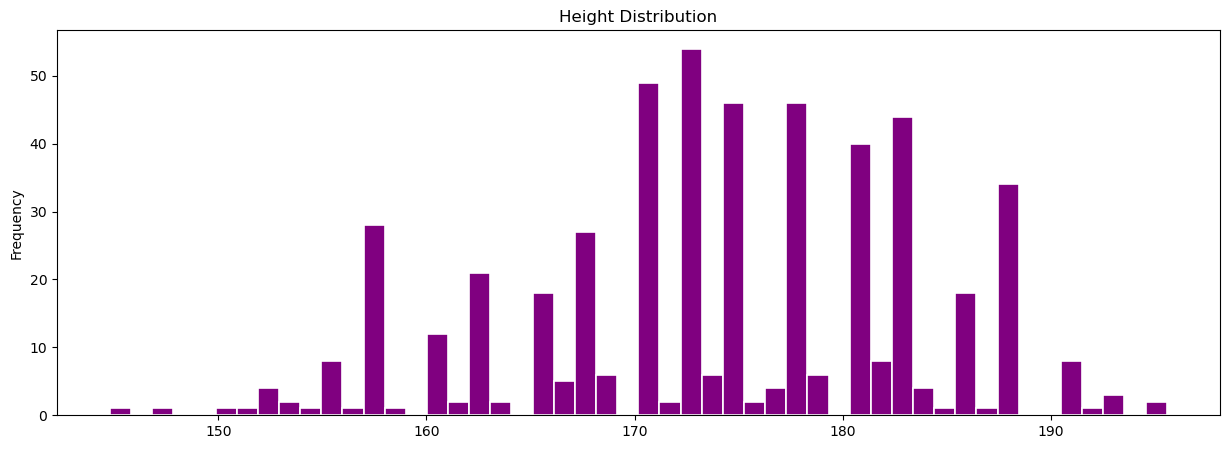

In [34]:
plot = df[df.columns[10]].plot.hist(title="Height Distribution", bins=int(df[df.columns[10]].max()-df[df.columns[10]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

In [35]:
unique_values = df['weight (kg)'].unique()

print(unique_values)

[68.492392   56.699      70.30676    74.84268    64.410064   64.863656
 52.16308    61.688512   68.0388     58.059776   76.657048   71.667536
 67.131616   70.760352   81.64656    54.43104    61.23492    49.89512
 72.57472    69.399576   83.91452    57.606184   59.420552   76.203456
 82.100152   69.853168   65.77084    58.96696    63.50288    50.802304
 48.987936   53.977448   68.945984   67.585208   83.007336   74.389088
 73.935496   62.595696   51.255896   65.317248   88.45044    73.481904
 71.213944   79.3786     55.791816   45.3592     53.070264   78.017824
 66.224432   66.678024   84.821704   90.7184     53.523856   77.11064
 80.285784   62.142104   75.749864   81.192968   60.781328   78.925008
 86.18248    87.996848   86.636072   79.832192   55.338224   77.564232
 70.6242744  73.028312   91.625584   72.121128   85.275296   82.553744
 85.728888   97.52228    90.264808   56.245408   78.471416   88.904032
 68.6738288  48.080752   60.327736   57.152592   87.543256   48.534344
 43.9984

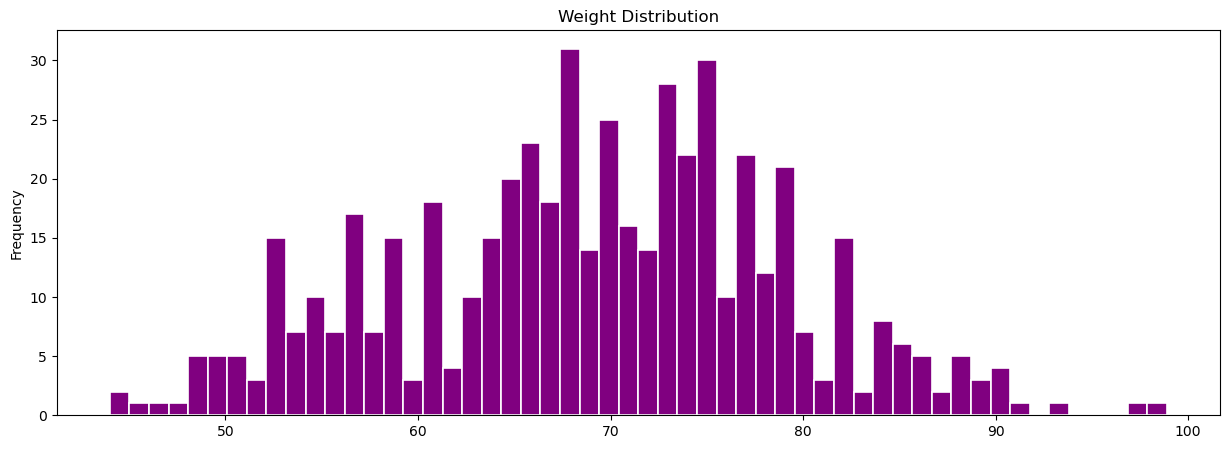

In [36]:
plot = df[df.columns[11]].plot.hist(title="Weight Distribution",
   bins=int(df[df.columns[11]].max()-df[df.columns[11]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

In [37]:
unique_values = df['span (cm)'].unique()

print(unique_values)

[165.1    162.56   187.96   182.88   177.8    193.04   189.23   164.465
 172.72   185.42   179.07   170.18   157.48   192.024  154.94    15.748
 190.5    180.34   194.31   175.26   160.02   186.69   152.4    191.77
 184.15   167.64   165.735  179.705  198.12   438.15   176.784  168.91
 176.53   203.2      2.54   184.023  163.83   184.912  196.85   482.6
 171.45   161.29   173.99     1.27    14.478  159.766  166.37   153.67
 129.54   194.818  170.942  147.32   195.58   181.61     5.08   197.612
 158.75   166.878   30.48   419.1    151.13   411.48   205.74   184.9882
 178.816  149.86   166.9288   0.     177.165  436.88   184.404  170.434
 186.0042 169.545 ]


In [39]:
#Remove the outliers for span
df = df[(df['span (cm)'] > 100)]


In [40]:
df = df[df['span (cm)'] < 250]  

In [41]:
unique_values = df['span (cm)'].unique()

print(unique_values)

[165.1    162.56   187.96   182.88   177.8    193.04   189.23   164.465
 172.72   185.42   179.07   170.18   157.48   192.024  154.94   190.5
 180.34   194.31   175.26   160.02   186.69   152.4    191.77   184.15
 167.64   165.735  179.705  198.12   176.784  168.91   176.53   203.2
 184.023  163.83   184.912  196.85   171.45   161.29   173.99   159.766
 166.37   153.67   129.54   194.818  170.942  147.32   195.58   181.61
 197.612  158.75   166.878  151.13   205.74   184.9882 178.816  149.86
 166.9288 177.165  184.404  170.434  186.0042 169.545 ]


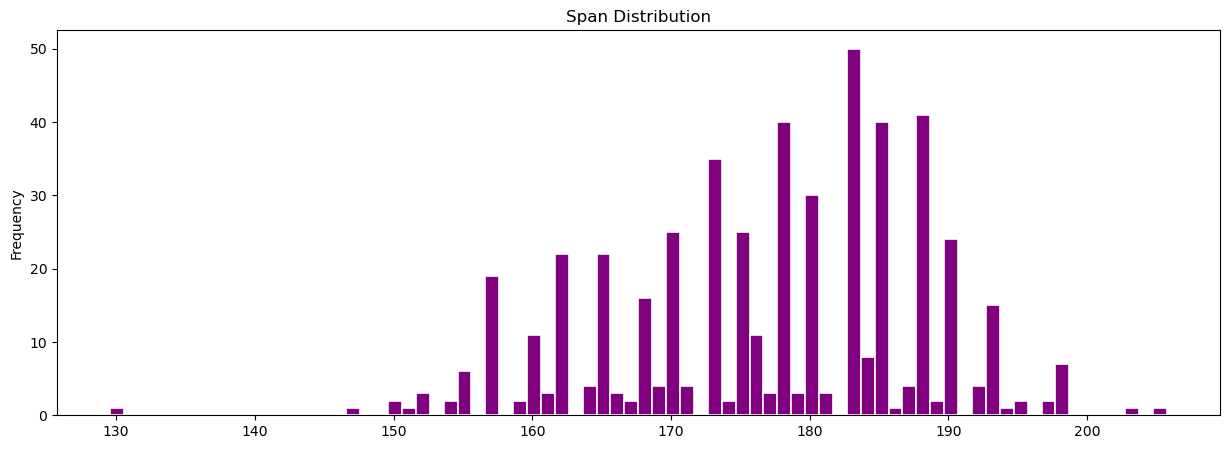

In [42]:
plot = df[df.columns[12]].plot.hist(title="Span Distribution", bins=int(df[df.columns[12]].max()-df[df.columns[12]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

In [43]:
df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm)
0,43,0,1,6,0,3,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100
1,16,0,5,4,4,2,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560
2,19,1,8,6,4,2,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960
3,34,1,7,6,3,2,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880
4,30,0,7,4,2,2,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,4,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400
608,48,0,4,6,1,1,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020
609,39,0,0,6,3,3,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545
610,25,1,9,3,1,2,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960


In [44]:
#Add a BMI column for analysis
df['BMI'] = df['weight (kg)'] / ((df['height (cm)'] / 100) ** 2)


In [45]:
df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm),BMI
0,43,0,1,6,0,3,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100,25.127437
1,16,0,5,4,4,2,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560,21.455963
2,19,1,8,6,4,2,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960,22.239938
3,34,1,7,6,3,2,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880,25.087886
4,30,0,7,4,2,2,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800,21.590787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,4,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400,19.621970
608,48,0,4,6,1,1,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020,22.142511
609,39,0,0,6,3,3,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545,18.702699
610,25,1,9,3,1,2,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960,21.900817


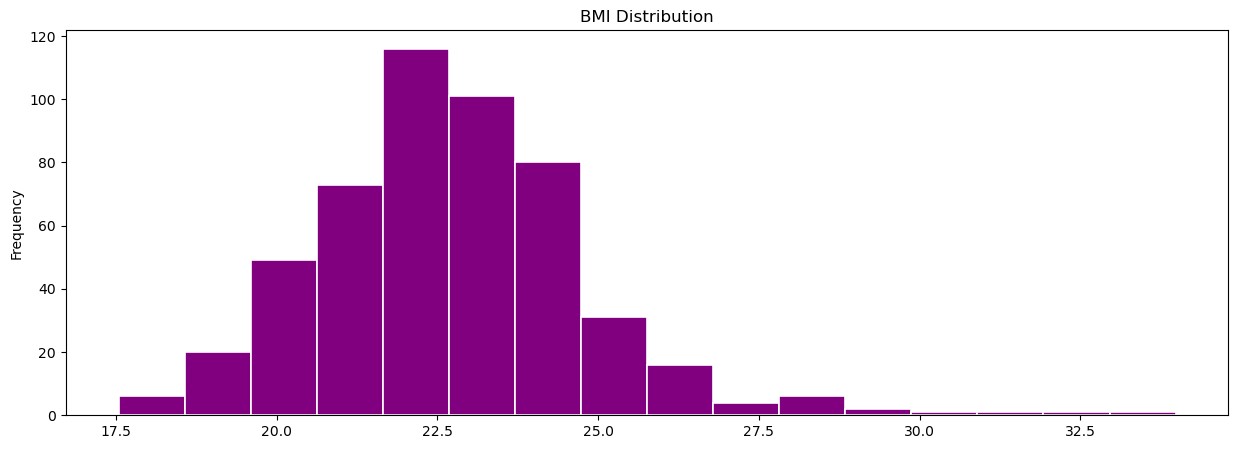

In [46]:
plot = df[df.columns[13]].plot.hist(title="BMI Distribution", bins=int(df[df.columns[13]].max()-df[df.columns[13]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

<AxesSubplot:xlabel='BMI'>

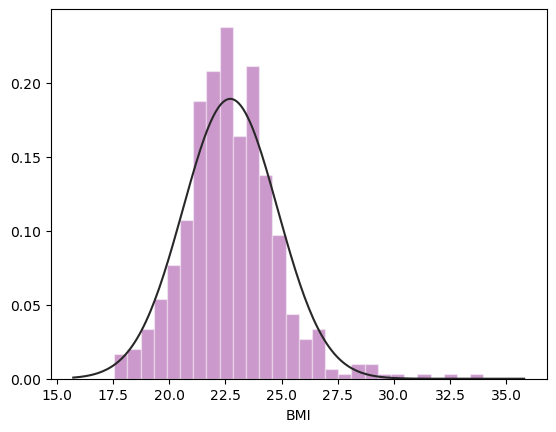

In [47]:
sns.distplot(df['BMI'], kde=False,fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

In [48]:
#Add a APE Index column for analysis
df['APE'] = df['span (cm)'] / df['height (cm)']

In [49]:
unique_values = df['APE'].unique()

print(unique_values)

[1.         1.05714286 1.05882353 1.02941176 1.03401361 1.04195804
 0.99615385 0.95522388 1.04615385 1.04347826 1.04285714 1.01388889
 1.01515152 0.92857143 0.98412698 1.04477612 1.22926829 0.98387097
 0.98529412 0.96969697 0.95384615 1.01351351 1.03378378 1.02777778
 0.98461538 1.01470588 1.03076923 1.01612903 1.07042254 1.02857143
 1.01449275 1.04255319 1.02898551 0.96923077 1.00684932 1.00729927
 1.02985075 1.02702703 0.98360656 1.01587302 1.03030303 1.04166667
 1.05970149 1.03174603 1.05797101 1.01492537 1.05633803 1.00719424
 1.04137931 1.015625   0.97142857 1.03278689 1.07801418 1.01333333
 1.05072464 1.03125    1.01953125 1.02909091 1.05405405 1.01408451
 1.02290076 1.04895105 1.0075188  1.01369863 1.01605839 1.0390625
 0.98550725 0.97101449 1.04545455 0.98484848 1.01398601 1.17647059
 1.02816901 0.97058824 0.97183099 1.04       0.9858156  1.03225806
 1.02739726 1.01428571 1.02027027 1.0078125  1.06766917 0.98571429
 0.99270073 1.03262411 1.01831502 0.95945946 1.00649351 0.98591

In [50]:
df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm),BMI,APE
0,43,0,1,6,0,3,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100,25.127437,1.000000
1,16,0,5,4,4,2,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560,21.455963,1.000000
2,19,1,8,6,4,2,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960,22.239938,1.057143
3,34,1,7,6,3,2,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880,25.087886,1.058824
4,30,0,7,4,2,2,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800,21.590787,1.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,4,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400,19.621970,0.987654
608,48,0,4,6,1,1,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020,22.142511,1.000000
609,39,0,0,6,3,3,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545,18.702699,1.015209
610,25,1,9,3,1,2,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960,21.900817,1.013699


<AxesSubplot:xlabel='APE'>

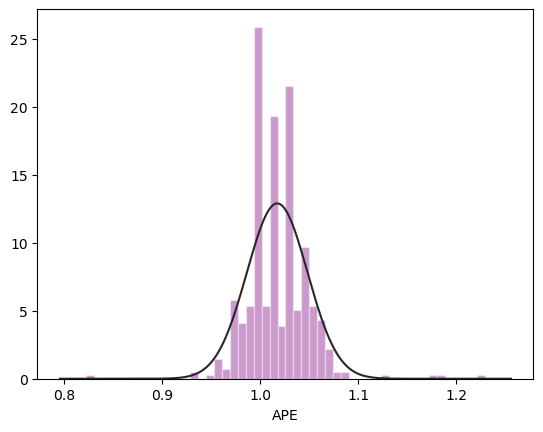

In [51]:
sns.distplot(df['APE'], kde=False, fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

In [52]:
#Add a Pull up ratio column for analysis
df["pullup_ratio"] = (df["weight (kg)"] + df["pullup"]) / df["weight (kg)"]

In [53]:
df

,age,sex,max_boulder,exp,trainexp,season,pullup,pushup,maxhang,weightedpull,height (cm),weight (kg),span (cm),BMI,APE,pullup_ratio
0,43,0,1,6,0,3,2.0,6.0,37.0,10.0,165.1000,68.492392,165.100,25.127437,1.000000,1.029200
1,16,0,5,4,4,2,15.0,30.0,10.0,20.0,162.5600,56.699000,162.560,21.455963,1.000000,1.264555
2,19,1,8,6,4,2,18.0,70.0,35.0,85.0,177.8000,70.306760,187.960,22.239938,1.057143,1.256021
3,34,1,7,6,3,2,15.0,35.0,50.0,70.0,172.7200,74.842680,182.880,25.087886,1.058824,1.200420
4,30,0,7,4,2,2,5.0,7.0,35.0,25.0,172.7200,64.410064,177.800,21.590787,1.029412,1.077628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,29,0,1,1,0,4,12.0,19.0,15.0,42.0,154.3050,46.719976,152.400,19.621970,0.987654,1.256849
608,48,0,4,6,1,1,7.0,15.0,35.0,22.0,160.0200,56.699000,160.020,22.142511,1.000000,1.123459
609,39,0,0,6,3,3,15.0,48.0,70.0,55.0,167.0050,52.163080,169.545,18.702699,1.015209,1.287560
610,25,1,9,3,1,2,32.0,48.0,75.0,135.0,185.4200,75.296272,187.960,21.900817,1.013699,1.424988


<AxesSubplot:xlabel='pullup_ratio'>

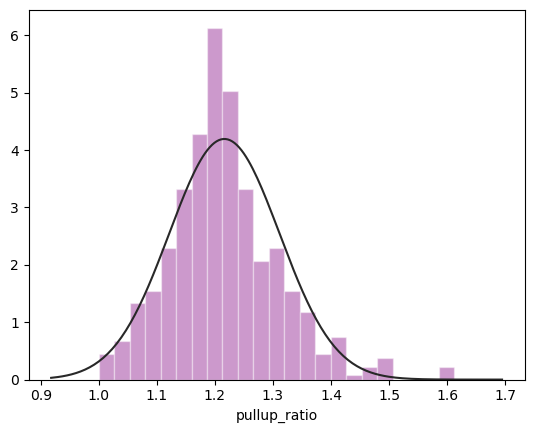

In [54]:
sns.distplot(df['pullup_ratio'], kde=False, fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

<AxesSubplot:xlabel='max_boulder'>

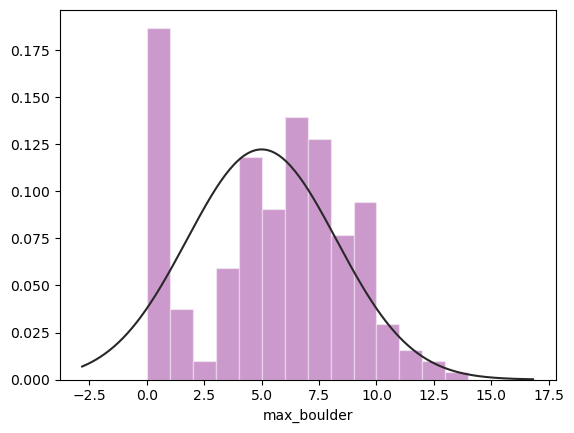

In [55]:
#plot max boulder
y = df["max_boulder"]
sns.distplot(y, kde=False, fit=st.norm, color='purple',hist_kws={'edgecolor': 'white'})

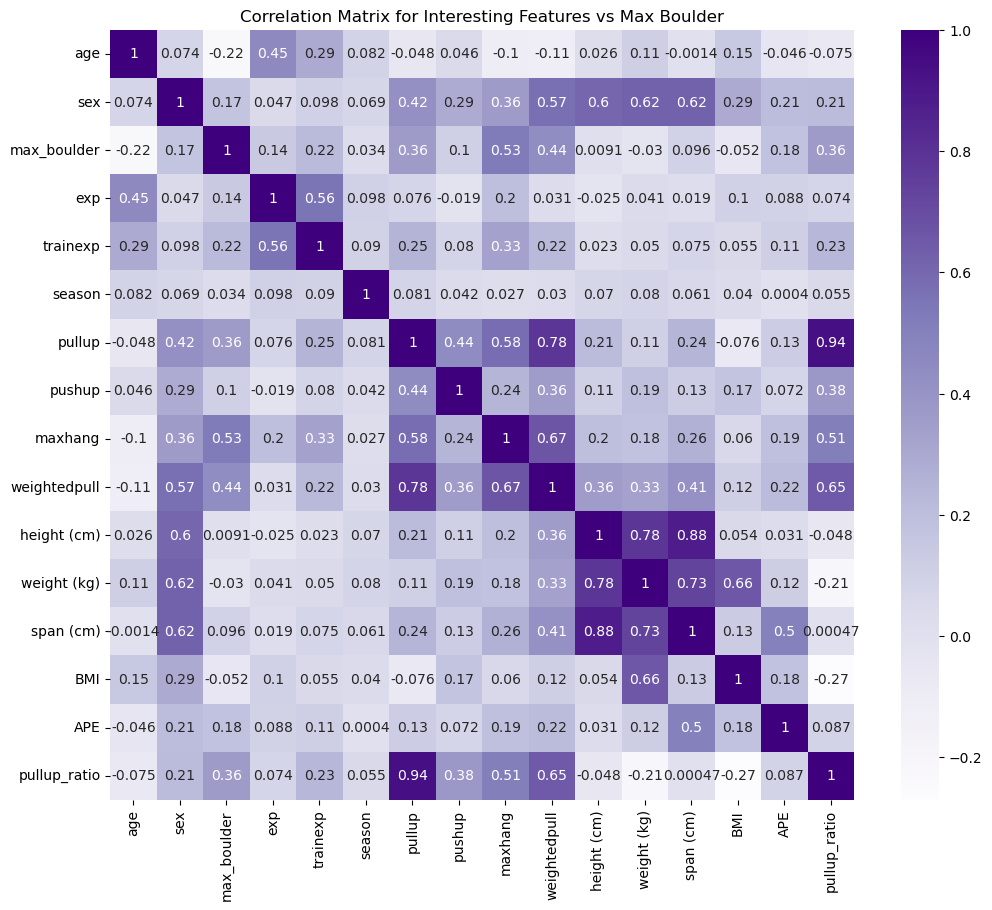

In [56]:
#selecting features for correlation matrix
feature = ['age', 'sex', 'max_boulder', 'exp', 'trainexp', 'season', 'pullup',
       'pushup', 'maxhang', 'weightedpull', 'height (cm)', 'weight (kg)',
       'span (cm)', 'BMI', 'APE', 'pullup_ratio']
df_feature = df[feature]

corr = df_feature.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cmap='Purples', annot=True)
plt.title('Correlation Matrix for Interesting Features vs Max Boulder')
plt.show()


In [57]:
#create an interactive widget in order to see various box plots
def create_box_plot(gender, variable):
    #mapping by gender values
    if gender == 'All':
        filtered_df = df
    else:
        gender_map = {'Male': 1, 'Female': 0, 'Other/Prefer to Not Answer': 3, 'Other':3}
        filtered_df = df[df['sex'] == gender_map[gender]]


    plt.figure(figsize=(12, 6))
    sns.boxplot(x='max_boulder', y=variable, data=filtered_df)
    plt.title(f"{variable} Distribution by Max Boulder and Gender")
    plt.xlabel("Max Boulder")
    plt.ylabel(variable)
    plt.show()

#create the drop down widget to select the variable and gender for the presented graph
gender_dropdown = widgets.Dropdown(options=['Male', 'Female', 'All'], value='All', description='Gender:')
variable_dropdown = widgets.Dropdown(options=feature, value='age', description='Variable:')
display(gender_dropdown)
display(variable_dropdown)

widgets.interactive_output(create_box_plot, {'gender': gender_dropdown, 'variable': variable_dropdown})

Dropdown(description='Gender:', index=2, options=('Male', 'Female', 'All'), value='All')

Dropdown(description='Variable:', options=('age', 'sex', 'max_boulder', 'exp', 'trainexp', 'season', 'pullup',…

Output()

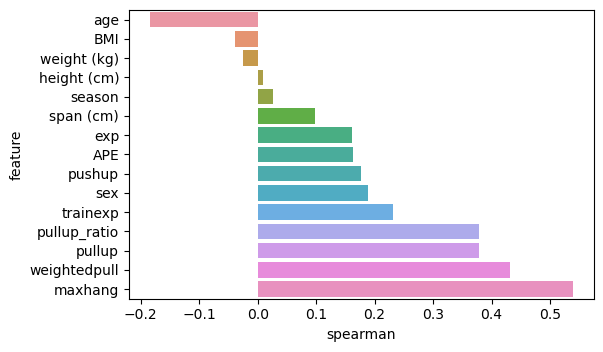

In [58]:
#spearman correlation for the features selected to determine the correlation of features to max boulder ability
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['max_boulder'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
    
quant_feat =['age', 'sex', 'exp', 'trainexp', 'season', 'pullup',
       'pushup', 'maxhang', 'weightedpull', 'height (cm)', 'weight (kg)',
       'span (cm)', 'BMI', 'APE', 'pullup_ratio']
    
spearman(df, quant_feat)